<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Classification with Python</font></h1>

In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [78]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [79]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2020-09-23 01:22:10--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.002s  

2020-09-23 01:22:10 (11.3 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File  

In [105]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df.shape

(346, 10)

### Convert to date time object 

In [106]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [82]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

In [7]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.6.20          |           py36_0         160 KB  anaconda
    openssl-1.1.1g             |       h7b6447c_0         3.8 MB  anaconda
    seaborn-0.11.0             |             py_0         216 KB  anaconda
    ca-certificates-2020.7.22  |                0         132 KB  anaconda
    ------------------------------------------------------------
                                           Total:         4.3 MB

The following packages will be UPDATED:

    ca-certificates: 2020.7.22-0        --> 2020.7.22-0       anaconda
    certifi:         2020.6.20-py36_0   --> 2020.6.20-py36_0  anaconda
    openssl:         1.1.1g-h7b6447c_0  --> 1.1.1g-h7b6447c_0 anaconda
    seaborn:         0.9.0-pyh91

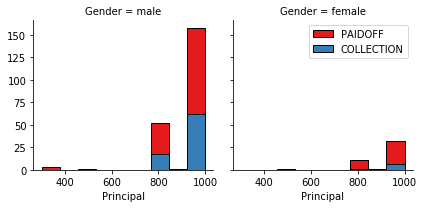

In [83]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

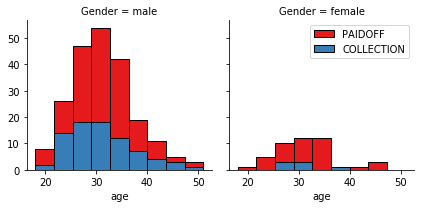

In [84]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

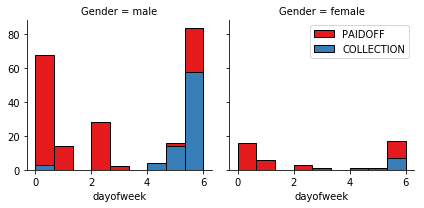

In [107]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [108]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head(10)

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1
5,7,7,PAIDOFF,1000,30,2016-09-09,2016-10-08,36,college,male,4,1
6,8,8,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,male,4,1
7,9,9,PAIDOFF,800,15,2016-09-10,2016-09-24,26,college,male,5,1
8,10,10,PAIDOFF,300,7,2016-09-10,2016-09-16,29,college,male,5,1
9,11,11,PAIDOFF,1000,15,2016-09-10,2016-10-09,39,High School or Below,male,5,1


## Convert Categorical features to numerical values

Lets look at gender:

In [87]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

In [13]:
df.groupby(['Gender','education'])['loan_status'].value_counts(normalize=True)

Gender  education             loan_status
female  Bechalor              PAIDOFF        1.000000
        High School or Below  PAIDOFF        0.800000
                              COLLECTION     0.200000
        college               PAIDOFF        0.863636
                              COLLECTION     0.136364
male    Bechalor              PAIDOFF        0.676471
                              COLLECTION     0.323529
        High School or Below  PAIDOFF        0.732824
                              COLLECTION     0.267176
        Master or Above       COLLECTION     0.500000
                              PAIDOFF        0.500000
        college               PAIDOFF        0.748031
                              COLLECTION     0.251969
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [109]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding  
#### How about education?

In [89]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature befor One Hot Encoding

In [90]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [91]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True) #Since there are only 2 individuals with "Master or Above" degrees
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature selection

Lets defind feature sets, X:

In [92]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?

In [93]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [94]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

In [21]:
#Getting training and testing data (80% training, 20% testing)

from sklearn.model_selection import train_test_split
X_train, X_test1, y_train, y_test1 = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test1.shape,  y_test1.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


In [22]:
#Let's fit the K nearest neighbor model (KNN)

from sklearn.neighbors import KNeighborsClassifier

k = 7  #We are randomly choosing a K value
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

#Predicting
yhat = neigh.predict(X_test1)
yhat[0:5]

#Accuracy classification score
#subset accuracy, this function calculates how closely the actual labers and predicted labers are matched in the test set. (jaccard similarity score function)
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test1, yhat))

Train set Accuracy:  0.8079710144927537
Test set Accuracy:  0.7857142857142857


In [23]:
#Let's repeat the previous process but with K=10

k = 10
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test1, neigh.predict(X_test1)))

Train set Accuracy:  0.7753623188405797
Test set Accuracy:  0.6714285714285714


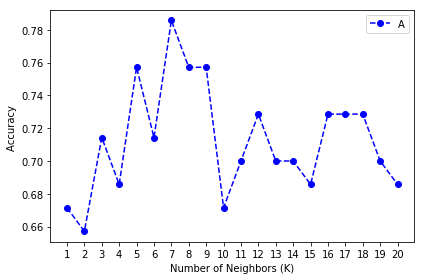

The best accuracy was with 0.7857142857142857 with k= 7


In [24]:
#We can see that both training and testing accuracy declined with K=10.
#Let's test the accuracy for different K's

#Testing accuracy for different K's
Ks = 20
mean_acc = np.zeros((Ks))
std_acc = np.zeros((Ks))
ConfustionMx = [];
for n in range(1,Ks+1):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test1)
    mean_acc[n-1] = metrics.accuracy_score(y_test1, yhat) #y_test, real world data; yhat is our predicted data

    
    std_acc[n-1]=np.std(yhat==y_test1)/np.sqrt(yhat.shape[0])

mean_acc

#Plotting model accuracy for different number of neighbors

plt.plot(range(1,Ks+1),mean_acc,'bo--', scalex=True)
#plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
#plt.legend(('Accuracy ', '+/- 3xstd'))

plt.legend(('Accuracy '))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.xticks(range(1,Ks+1))
plt.tight_layout()
plt.show()
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

In [25]:
#Let's recompute the model with K=7 and all the train data
#No convergence value is at sight

k = 7
#Train Model
credit_knn = KNeighborsClassifier(n_neighbors = k).fit(X,y)

# Decision Tree

In [57]:
#Let's try now with a decision tree
from sklearn.tree import DecisionTreeClassifier

#Create a decision tree object
#set entropy so we can see the information gain
creditTree = DecisionTreeClassifier(criterion="entropy", max_depth = 3)


#fit the data into the model
creditTree.fit(X_train, y_train)

#Predict
predTree = creditTree.predict(X_test1)
print(predTree[0:7])
print(y_test1[0:7])
print("Train set Accuracy: ", metrics.accuracy_score(y_train, creditTree.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test1, predTree) )

['COLLECTION' 'COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF']
['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'COLLECTION']
Train set Accuracy:  0.7463768115942029
Test set Accuracy:  0.6142857142857143


In [67]:
#This method performed worse than kNN, lets try with a higher max_depth
#Create a decision tree object
#set entropy so we can see the information gain
creditTree = DecisionTreeClassifier(criterion="entropy", max_depth =7)


#fit the data into the model
creditTree.fit(X_train, y_train)

#Predict
predTree = creditTree.predict(X_test1)
#print(predTree[0:7])
#print(y_test1[0:7])
print("Train set Accuracy: ", metrics.accuracy_score(y_train, creditTree.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test1, predTree) )

Train set Accuracy:  0.7898550724637681
Test set Accuracy:  0.7571428571428571


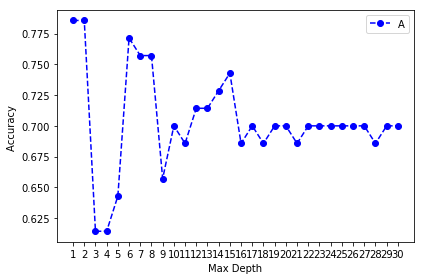

The best accuracy was with 0.7857142857142857 with max_depth of =  1


In [139]:
#A higher max_depth value provided a better accuracy. Lets test for different max_depth values and plot the accuracies vs max_depth

Md = 30
mean_acc = np.zeros((Md))
std_acc = np.zeros((Md))
ConfustionMx = [];
for n in range(1, Md+1):
    
    #Train Model and Predict  
    creditTree = DecisionTreeClassifier(criterion="entropy", max_depth = n)
    creditTree.fit(X_train, y_train)
    yhat=creditTree.predict(X_test1)
    mean_acc[n-1] = metrics.accuracy_score(y_test1, yhat) #y_test, real world data; yhat is our predicted data
    
    std_acc[n-1]=np.std(yhat==y_test1)/np.sqrt(yhat.shape[0])

#Plotting model accuracy for different number of neighbors

plt.plot(range(1,Md+1),mean_acc,'bo--', scalex=True)
#plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
#plt.legend(('Accuracy ', '+/- 3xstd'))

plt.legend(('Accuracy '))
plt.ylabel('Accuracy ')
plt.xlabel('Max Depth')
plt.xticks(range(1,Md+1))
plt.tight_layout()
plt.show()
print( "The best accuracy was with", mean_acc.max(), "with max_depth of = ", mean_acc.argmax()+1)


In [68]:
#Since it is counter intuitive to create a decision tree with a depth of 1 or 2, we'll pick a Max_Depth of 6 for our model.
#Create and fit the model with all of our train data
#Notice that the accuracy converges to a value close to 0.7

creditTree = DecisionTreeClassifier(criterion="entropy", max_depth =6)

#fit the data into the model
creditTree.fit(X, y)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Support Vector Machine

In [95]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

In [131]:
#df2=df.copy() #we create a copy of df just so that we don't modify the original df
#df2.head()

In [130]:
#Let's create a graph of the Paidoff and collection loans with respect to the principal ammount and gender
#df2=df.copy()
#df2['loan_status']=df2['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1],inplace=False)
#df2.head()
#ax = df2[df2['loan_status'] == 0][0:50].plot(kind='scatter', x='age', y='terms', color='DarkBlue', label='Paidoff');
#df2[df2['loan_status'] == 1][0:50].plot(kind='scatter', x='age', y='terms', color='Yellow', label='Collection', ax=ax);
#plt.show()

In [114]:
#modeling SVM
from sklearn import svm
credit_SVM = svm.SVC(C=1.0, kernel='rbf')
credit_SVM.fit(X_train, y_train)

print("Train set Accuracy: ", metrics.accuracy_score(y_train, credit_SVM.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test1, credit_SVM.predict(X_test1)) )
#credit_SVM.fit(X, y)

Train set Accuracy:  0.782608695652174
Test set Accuracy:  0.7428571428571429


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [145]:
#The accuracy with the default regularizacion parameter (1) is of 0.74, let's see what happens when 
#we try with smaller C's (since this is an inverse parameter, a smaller C will give a higher effect)

credit_SVM = svm.SVC(C=0.1, kernel='rbf')
credit_SVM.fit(X_train, y_train)

print("Train set Accuracy: ", metrics.accuracy_score(y_train, credit_SVM.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test1, credit_SVM.predict(X_test1)) )
#credit_SVM.fit(X, y)

Train set Accuracy:  0.7427536231884058
Test set Accuracy:  0.7857142857142857


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packa

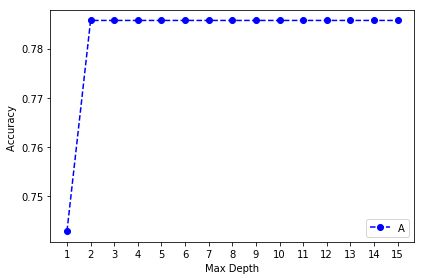

The best accuracy was with 0.7857142857142857 with C =  0.5


In [148]:
#We cann see that the test accuracy increased but the train accuracy decreased.
#Lets try again, but with multiple values of C

#A higher max_depth value provided a better accuracy. Lets test for different max_depth values and plot the accuracies vs max_depth

C = 15
mean_acc = np.zeros((C))
std_acc = np.zeros((C))
ConfustionMx = [];
for n in range(1, C+1):
    
    #Train Model and Predict  
    credit_SVM = svm.SVC(C=1/n, kernel='rbf')
    credit_SVM.fit(X_train, y_train)
    yhat=credit_SVM.predict(X_test1)
    mean_acc[n-1] = metrics.accuracy_score(y_test1, yhat) #y_test, real world data; yhat is our predicted data
    
    std_acc[n-1]=np.std(yhat==y_test1)/np.sqrt(yhat.shape[0])

#Plotting model accuracy for different number of neighbors

plt.plot(range(1,C+1),mean_acc,'bo--', scalex=True)
#plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
#plt.legend(('Accuracy ', '+/- 3xstd'))

plt.legend(('Accuracy '))
plt.ylabel('Accuracy ')
plt.xlabel('Max Depth')
plt.xticks(range(1,C+1))
plt.tight_layout()
plt.show()
print( "The best accuracy was with", mean_acc.max(), "with C = ", 1/(mean_acc.argmax()+1))



In [149]:
#The accuracy seems to converge rapidly, the C value we'll choose for this model is of C=0.5
# We'll train the SVM model with a C of 0.5 and all of the training data.
credit_SVM = svm.SVC(C=0.5, kernel='rbf')
credit_SVM.fit(X, y)

SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

# Logistic Regression

In [150]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

In [152]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
credit_LR = LogisticRegression(C=1, solver='liblinear').fit(X_train,y_train)
yhat = credit_LR.predict(X_test1)

print("Train set Accuracy: ", metrics.accuracy_score(y_train, credit_LR.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test1, credit_LR.predict(X_test1)) )

Train set Accuracy:  0.7644927536231884
Test set Accuracy:  0.7428571428571429


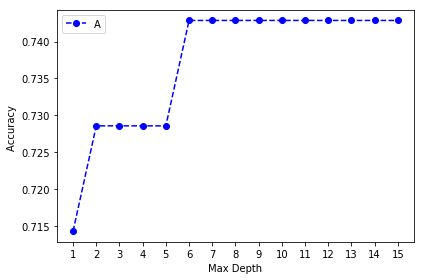

The best accuracy was with 0.7428571428571429 with C =  0.16666666666666666


In [158]:
#Just as SVM, smaller values of C mean a stronger regularization. Let's plot the accuracy for multiple values of C
C = 15
mean_acc = np.zeros((C))
std_acc = np.zeros((C))
ConfustionMx = [];
for n in range(1, C+1):
    
    #Train Model and Predict  
    credit_LR = LogisticRegression(C= 1/n, solver='liblinear').fit(X_train,y_train)
    yhat = credit_LR.predict(X_test1)
    mean_acc[n-1] = metrics.accuracy_score(y_test1, yhat) #y_test, real world data; yhat is our predicted data
    
    std_acc[n-1]=np.std(yhat==y_test1)/np.sqrt(yhat.shape[0])

#Plotting model accuracy for different number of neighbors

plt.plot(range(1,C+1),mean_acc,'bo--', scalex=True)
#plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
#plt.legend(('Accuracy ', '+/- 3xstd'))

plt.legend(('Accuracy '))
plt.ylabel('Accuracy ')
plt.xlabel('Max Depth')
plt.xticks(range(1,C+1))
plt.tight_layout()
plt.show()
print( "The best accuracy was with", mean_acc.max(), "with C = ", 1/(mean_acc.argmax()+1))

In [159]:
#The accuracy seems to converge to 0.743 when C=0.166
#Lets fit the model with all of the training data and the aforementioned C value
credit_LR = LogisticRegression(C= 1/6 , solver='liblinear').fit(X_train,y_train)

# Model Evaluation using Test set

In [160]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:

In [161]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2020-09-23 02:09:23--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2020-09-23 02:09:23 (426 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation 

In [162]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [163]:
#We apply the same data treatment as to our train data:

#convert  date time format to datetime value
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])

test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek #translate date to day of the week
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0) #Numerical variable for either weekend (Friday to Sunday) or weekday.

#Convert categorical variables to numerical
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

test_Feature = test_df[['Principal','terms','age','Gender','weekend']] #select the variables we want to work with
test_Feature = pd.concat([test_Feature,pd.get_dummies(test_df['education'])], axis=1)#get dummy variables for education type
test_Feature.drop(['Master or Above'], axis = 1,inplace=True) #Since there are only 2 individuals with "Master or Above" degrees

X_test = test_Feature
print(X[0:5])

y_test = test_df['loan_status'].values
print(y[0:5])

#normalizing data
X_test= preprocessing.StandardScaler().fit(X_test).transform(X_test)

[[ 0.51578458  0.92071769  2.33152555 -0.42056004 -1.20577805 -0.38170062
   1.13639374 -0.86968108]
 [ 0.51578458  0.92071769  0.34170148  2.37778177 -1.20577805  2.61985426
  -0.87997669 -0.86968108]
 [ 0.51578458 -0.95911111 -0.65321055 -0.42056004 -1.20577805 -0.38170062
  -0.87997669  1.14984679]
 [ 0.51578458  0.92071769 -0.48739188  2.37778177  0.82934003 -0.38170062
  -0.87997669  1.14984679]
 [ 0.51578458  0.92071769 -0.3215732  -0.42056004  0.82934003 -0.38170062
  -0.87997669  1.14984679]]
['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:24: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.


In [164]:
##KNN
#Let's calculate the Jaccard index and F1-score.
#Jaccard
print("The Jaccard index is: ", jaccard_similarity_score(y_test, credit_knn.predict(X_test)), "out of 1")
#F1-score, we'll use y test and yhat as binary variables
print("The F1-score is: ", f1_score(y_test, credit_knn.predict(X_test), average='weighted') , "out of 1") 

The Jaccard index is:  0.7222222222222222 out of 1
The F1-score is:  0.7001989201477693 out of 1


In [169]:
#Decision Tree
yhat=creditTree.predict(X_test)

#Let's evaluate our model
print("The Jaccard index is: ", jaccard_similarity_score(y_test, yhat), "out of 1")
print("The F1-score is: ", f1_score(y_test, yhat, average='weighted') , "out of 1") 

The Jaccard index is:  0.7407407407407407 out of 1
The F1-score is:  0.6304176516942475 out of 1


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [170]:
#SVM
yhat_svm = credit_SVM.predict(X_test)

#Let's evaluate our model
print("The Jaccard index is: ", jaccard_similarity_score(y_test, yhat_svm), "out of 1")
print("The F1-score is: ", f1_score(y_test, yhat_svm, average='weighted') , "out of 1")

The Jaccard index is:  0.7407407407407407 out of 1
The F1-score is:  0.6304176516942475 out of 1


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [178]:
#Logistic regression
yhat_lr = credit_LR.predict(X_test)

#Let's evaluate our model
print("The Jaccard index is: ", jaccard_similarity_score(y_test, yhat_lr), "out of 1")
print("The F1-score is: ", f1_score(y_test, yhat_lr, average='weighted') , "out of 1")

"We convert the categorical variables PAIDOFF and COLLECTION to num values to be able to perform logloss"
dict = {"PAIDOFF": 0, "COLLECTION": 1}  
y_test_d = np.vectorize(dict.get)(y_test)
yhat_lr_d = np.vectorize(dict.get)(yhat_lr)

print("The logloss score is: ", log_loss(y_test_d, yhat_lr_d), "where 0 is the best outcome")

The Jaccard index is:  0.7592592592592593 out of 1
The F1-score is:  0.6717642373556352 out of 1
The logloss score is:  8.31489061358961 where 0 is the best outcome


# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | 0.722      | 0.700        | NA      |
| Decision Tree      | 0.741       | 0.630      | NA      |
| SVM                | 0.741       | 0.630        | NA      |
| LogisticRegression |0.759      | 0.672       | 8.314       |

From the table above, LogisticRegression performed better according to the Jaccard index (similarity of predicted data vs test data), whereas KNN performed better according to F1-score (test of accuracy in binary statistics, correctly and incorrectly predicted paidoffs and collections). Since the values of both Jaccard and F1-score go from 0 to 1, we could choose the logisticregression as our best model for predicting loan default.

<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>